In [1]:
import csv
import os
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
os.chdir('../..')
os.getcwd()

'D:\\_SyncNodes\\Projects\\_Complex\\BigDataEntrance\\PythonScripts'

In [3]:
def load_counts_table(file_path: str) -> pd.DataFrame:
    counts = pd.DataFrame(
        columns=['count'],
        index=pd.MultiIndex(
            levels=[[], [], []],
            codes=[[], [], []],
            names=['country', 'year', 'quarter']
        )
    )

    with open(file_path, 'r', newline='') as input_file:
        reader = csv.reader(input_file, delimiter='\t', escapechar='\\')
        for line in reader:
            country = line[0]
            year = int(line[1])
            quarter = int(line[2])
            count = int(line[3])

            counts.loc[(country, year, quarter), :] = count

    return counts.sort_index()

In [4]:
def polyfit_d1(values_list: List[int]) -> List[float]:
    args = list(range(len(values_list)))
    return list(np.polyfit(args, values_list, 1, full=True)[0])

In [5]:
def create_poly_coefficient_table(counts_table):
    coefficients = pd.DataFrame(columns=['x', '1'])
    for country in counts_table.index.levels[0]:
        y = list(counts_table.loc[country]['count'])
        coefficients.loc[country] = polyfit_d1(y)
    return coefficients

In [6]:
def create_graph(ax, counts_table, coefficients_table, country):
    y = list(counts_table.loc[country]['count'])
    x = list(range(len(y)))

    arg = np.linspace(0, len(x) - 1, 100)
    values = np.polyval(coefficients_table.loc[country], arg)

    ax.plot(x, y, '.')
    ax.plot(arg, values)

# Questions

In [7]:
questions_counts_table = load_counts_table('input/aggregations/questions.csv')

In [8]:
questions_coefficients_table = create_poly_coefficient_table(questions_counts_table)

In [9]:
questions_coefficients_table.sort_values('x', ascending=False).head(10)

,x,1
India,594.888698,10825.949495
Germany,165.984220,4256.751515
United States,157.221498,24739.593266
France,109.260263,1698.436364
Brazil,72.857747,2444.769697
Pakistan,72.259882,531.853872
Italy,64.643606,1270.074074
Poland,58.380103,1076.186532
Canada,56.822184,5812.508418
Russia,55.061826,1327.731987


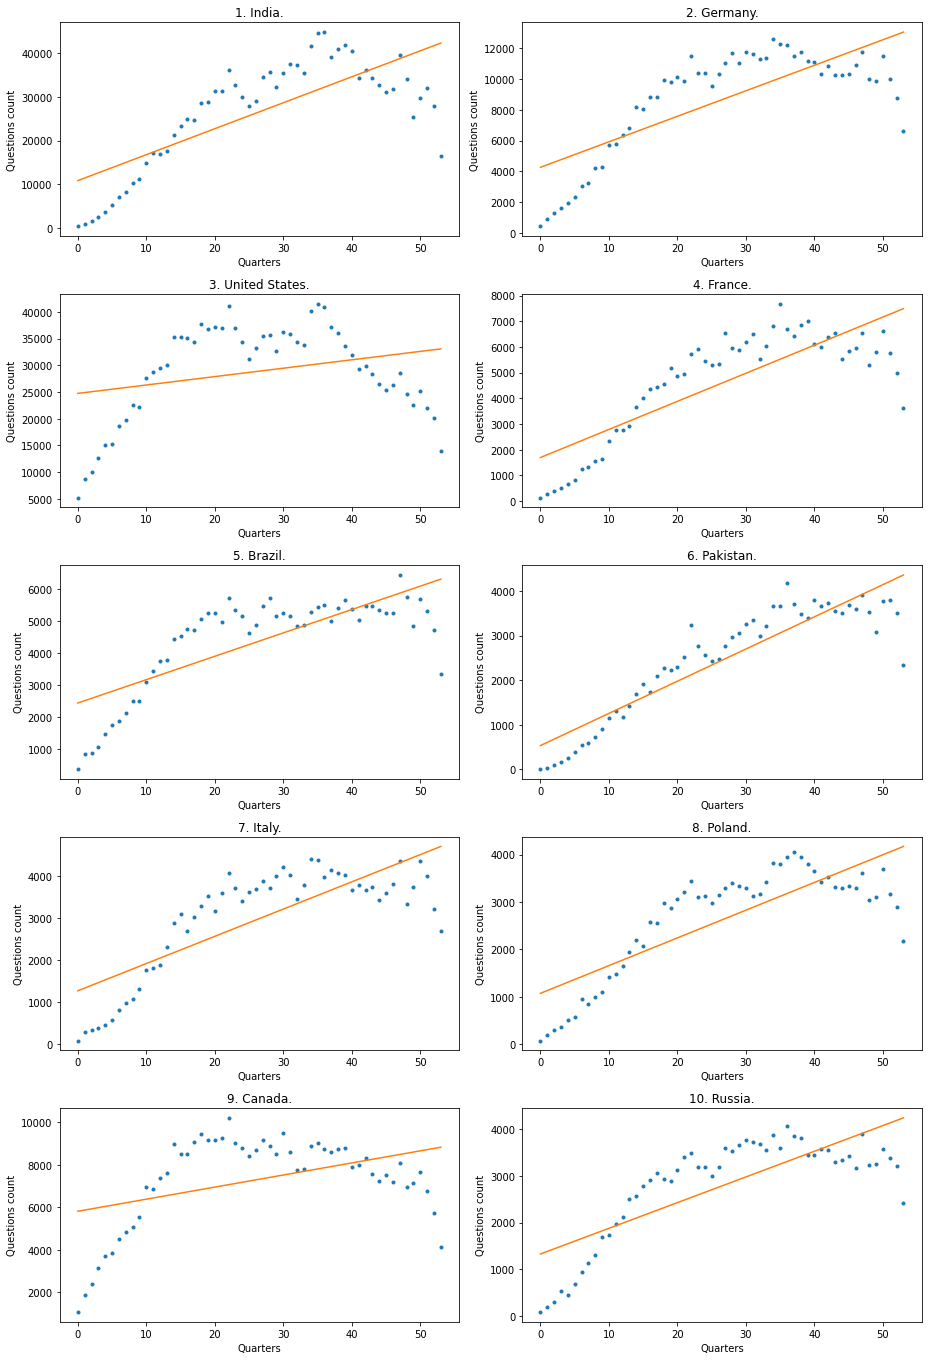

In [10]:
fig, ax = plt.subplots(5, 2, figsize=(13, 19))

top_10_countries = questions_coefficients_table.sort_values('x', ascending=False).head(10).index
for i, country in enumerate(top_10_countries):
    i_ax = ax[i // 2][i % 2]
    i_ax.set_title(f'{i + 1}. {country}.')
    i_ax.set_xlabel('Quarters')
    i_ax.set_ylabel('Questions count')
    create_graph(i_ax, questions_counts_table, questions_coefficients_table, country)
fig.tight_layout()

# Answers

In [11]:
answers_counts_table = load_counts_table('input/aggregations/answers.csv')

In [12]:
answers_coefficients_table = create_poly_coefficient_table(answers_counts_table)

In [13]:
answers_coefficients_table.sort_values('x', ascending=False).head(10)

,x,1
India,1038.811283,22439.501010
Germany,187.039337,22397.661279
France,173.477644,8795.546128
Poland,114.676348,3900.447138
Russia,106.390928,4563.418182
Bangladesh,105.205908,-221.086195
Iran,101.090719,-145.737374
Pakistan,99.247265,1232.465993
Turkey,80.717286,618.769697
Italy,80.513284,4080.175758


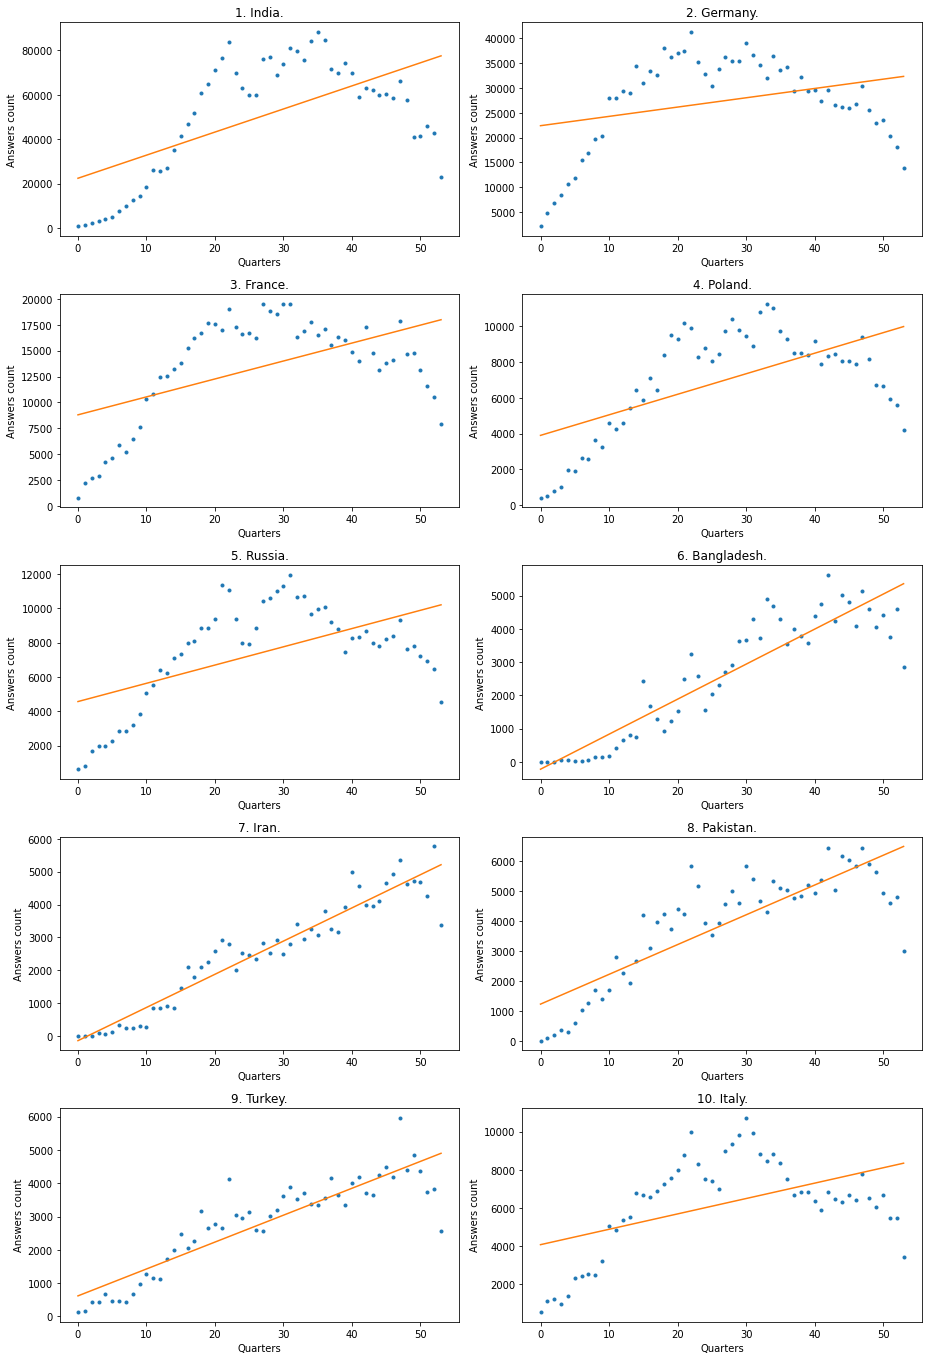

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(13, 19))

top_10_countries = answers_coefficients_table.sort_values('x', ascending=False).head(10).index
for i, country in enumerate(top_10_countries):
    i_ax = ax[i // 2][i % 2]
    i_ax.set_title(f'{i + 1}. {country}.')
    i_ax.set_xlabel('Quarters')
    i_ax.set_ylabel('Answers count')
    create_graph(i_ax, answers_counts_table, answers_coefficients_table, country)
fig.tight_layout()

# Comments

In [15]:
comments_counts_table = load_counts_table('input/aggregations/comments.csv')

In [16]:
comments_coefficients_table = create_poly_coefficient_table(comments_counts_table)

In [17]:
comments_coefficients_table.sort_values('x', ascending=False).head(10)

,x,1
India,2587.616886,38077.948822
United States,1559.332495,144753.911111
Germany,1230.584906,32850.925926
France,633.267353,12021.729966
Canada,489.391347,31909.944108
United Kingdom,480.894416,76517.464646
Australia,406.336916,22509.423569
Netherlands,384.287822,16344.354209
Poland,367.286640,4653.922559
Brazil,310.858281,13521.422222


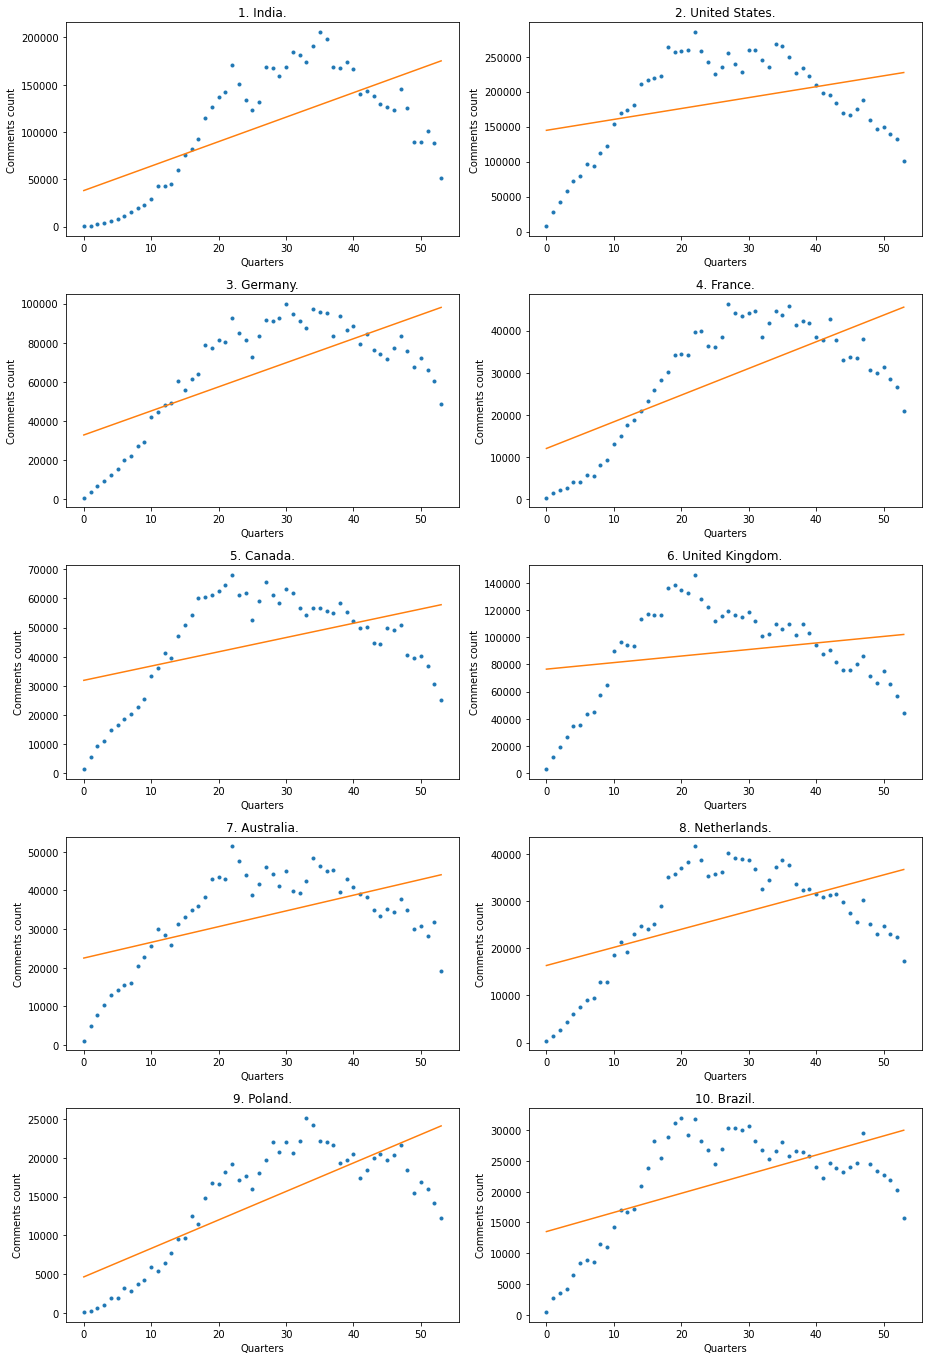

In [18]:
fig, ax = plt.subplots(5, 2, figsize=(13, 19))

top_10_countries = comments_coefficients_table.sort_values('x', ascending=False).head(10).index
for i, country in enumerate(top_10_countries):
    i_ax = ax[i // 2][i % 2]
    i_ax.set_title(f'{i + 1}. {country}.')
    i_ax.set_xlabel('Quarters')
    i_ax.set_ylabel('Comments count')
    create_graph(i_ax, comments_counts_table, comments_coefficients_table, country)
fig.tight_layout()